In [1]:
import numpy as np
import pandas as pd


In [2]:
print('Solution 5')
v1=np.array([[1,2],[3,4]])
v2=np.array([[1,5],[9,0]])

def findEuclidean(v1,v2):
    if v1.shape==v2.shape:
        v3=np.array(abs(v2-v1))
        v3=v3.flatten()
        sum=0
        for x in v3:
            sum=sum+np.square(x)
        dist=np.sqrt(sum)
        return dist 
    else:
        print('Both vectors are unequal')
        return
print(findEuclidean(v1,v2))

Solution 5
7.810249675906654


In [3]:
print('Solution 6')
v1=np.array([[1,2],[3,4]])
v2=np.array([[1,5],[9,0]])

def findManhattan(v1,v2):
    if v1.shape==v2.shape:
        v3=np.array(abs(v2-v1))
        v3=v3.flatten()
        total =0
        for x in v3:
            total=total+x                
        return total
    else:
        print('Both vectors are unequal')
        return
print(findManhattan(v1,v2))

Solution 6
13


In [4]:
print('Solution 7')


def get_accuracy(actual,prediction):
    correct=0
    if actual.shape==prediction.shape:
        for x in range(0, len(actual)):
            if actual[x] == prediction[x]:
                correct=correct+1
    accuracy=round(correct/len(actual),8)
    return accuracy


# generalization error

def get_generalization_error(actual,prediction):
    return round(1-get_accuracy(actual,prediction),8)

Solution 7


In [5]:
print('Solution 8 and 9')



def confusion_matrix(actual, prediction):
    FN,TN,FP,TP=0,0,0,0
    if actual.shape==prediction.shape:
        for x in range(0, len(actual)):
            if actual[x] == 0 and actual[x]==prediction[x]:
                TN=TN+1
            if actual[x]==1 and actual[x]==prediction[x]:
                TP=TP+1
            if actual[x]==0 and actual[x]!=prediction[x]:
                FP=FP+1
            if actual[x]==1 and actual[x]!=prediction[x]: 
                FN=FN+1  
    return (np.array([[TN,FP],[FN,TP]]))


def precision_score(actual,prediction):
    cm=confusion_matrix(actual,prediction)
    precision=cm[1,1]/(cm[1,1]+cm[0,1])
    return round(precision,8)

def recall_score(actual,prediction):
    cm=confusion_matrix(actual,prediction)
    recall=cm[1,1]/(cm[1,1]+cm[1,0])
    return round(recall,8)

def f1_score(actual,prediction):
    precision=precision_score(actual,prediction)
    recall=recall_score(actual,prediction)
    f1_score_value=2*(precision*recall)/(precision+recall)
    return round(f1_score_value,8)


    

Solution 8 and 9


In [29]:
print('Solution 10')
# Generate Receiver Operating Curve

def get_tpr_fpr_threshold(y_train,y_scores):
    
    thresholds=np.arange(0,1.1,0.1)
    TPR=[]
    FPR=[]
    i=0
    tp,fp,tn,fn=0,0,0,0
    
    for t in thresholds:
        for i in range(len(y_scores)):
            
            if np.logical_and(y_scores[i]>t , y_train[i]==1):
                tp=tp+1
            if np.logical_and(y_scores[i]<t , y_train[i]==0):
                tn=tn+1
            if np.logical_and(y_scores[i]>t , y_train[i]==0):
                fp=fp+1
            if np.logical_and(y_scores[i]<t , y_train[i]==1):
                fn=fn+1   
            
        tpr=tp/(tp+fn)
        fpr=fp/(fp+tn)
        FPR.append(fpr)
        TPR.append(tpr)
    return TPR,FPR, thresholds

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()




    
    
    

Solution 10


<Figure size 720x432 with 0 Axes>

In [7]:
print('Solution 11')
# Compute area under the curve
def area_under_curve(tpr,fpr):
    return np.trapz(tpr,x=fpr)

Solution 11


In [31]:
print('Solution 12')
# Generate precision recall curve
import matplotlib.pyplot as plt1
plt.style.use('ggplot')
def generate_precision_recall_curve(y_train,y_scores):
    thr = 0
    precisions = []
    recalls = []
    tp,fp,tn,fn=0,0,0,0
    thresholds = np.arange(0,1.1,0.5)
    for t in thresholds:
        for i in range(len(y_scores)):
            
            if np.logical_and(y_scores[i]>t , y_train[i]==1):
                tp=tp+1
            if np.logical_and(y_scores[i]<t , y_train[i]==0):
                tn=tn+1
            if np.logical_and(y_scores[i]>t , y_train[i]==0):
                fp=fp+1
            if np.logical_and(y_scores[i]<t , y_train[i]==1):
                fn=fn+1   
            
        preci=  tp/(tp+fp)  
        recall= tp/(tp+fn)
        
       
        precisions.append(preci)
        recalls.append(recall)
    fig1 = plt1.figure(figsize=(10, 6))
    plt1.plot(thresholds, np.array(precisions), "b--",  linewidth=8, label="Precision") 
    plt1.plot(thresholds, np.array(recalls), "g-",  linewidth=3, label="Recall") 
    plt1.xlabel("Threshold")
    plt1.legend(loc="lower right")
    plt1.title('Precision-Recall Curve')
    plt1.xlim([0, 1])
    plt1.ylim([0, 1.1])
    plt1.show()


Solution 12


In [9]:
print('Solution 13')

class KnnClassifier:
    
    def fit(self, training_features, training_labels, k, distance_f, **kwargs):
        self.X_train=training_features
        self.y_train=training_labels
        self.neighbours=k
        self.distance_f=distance_f
        
        for key, value in kwargs.items(): 
            if key=='metric':
                self.metric=value
            if key=='leaf_size':
                self.leaf_size=value
            if key=='threshold':
                self.threshold=value
            if key=="weights":
                self.weights=value
        
        
        
    def __init__(self):
        self.X_train=np.array([])
        self.y_train=np.array([])
        self.neighbours=1
        self.distance_f=1
        self.p=2
        self.threshold=0.5
        self.weights="uniform"
        pass
    
    def predict(self, test_features):
        dtype = [('distance', np.float64), ('class', np.int16)]
        values=np.zeros(shape=(test_features.shape[0],self.X_train.shape[0]),dtype=dtype)  
        
        for i in range(test_features.shape[0]): # every test feature        
            for j in range(self.X_train.shape[0]):#comparing to train feature
                
                if(self.distance_f==1):                                       
                    data=(findManhattan(X_train[j],test_features[i]))
                    values[i,j]=(data,(self.y_train[j]))
                if(self.distance_f==2) :                                   
                    data=(findEuclidean(X_train[j],test_features[i]))
                    values[i,j]=(data,(self.y_train[j]))
          
        values=np.sort(values,order='distance') #sort the distances in ascending order to find minimum distances      
        #find the class for each test data
         
        y_pred=np.zeros(shape=(test_features.shape[0],))
        y_prob_class_one=np.zeros(shape=(test_features.shape[0],))
        y_prob_class_zero=np.zeros(shape=(test_features.shape[0],))
        for i in range(values.shape[0]):
            prob_one,prob_zero=0.,0.
            class_one,class_zero=0.,0.
            for j in range(self.neighbours):
                each_value=values[i,j]
                
                if self.weights=="uniform":
                    if(int(each_value[1])==0):
                        class_zero=class_zero+1
                        
                    if(int(each_value[1])==1):
                        class_one=class_one+1
                        
                if self.weights=="distance":
                    if(int(each_value[1])==0):
                        class_zero=class_zero+(1/each_value[0])
                    if(int(each_value[1])==1):
                        class_one=class_one+(1/each_value[0])
            prob_one=class_one/(class_one+class_zero)
            y_prob_class_one[i]=prob_one
            prob_zero=class_zero/(class_one+class_zero)
            y_prob_class_zero[i]=prob_zero
            if prob_one>prob_zero:
                if prob_one>self.threshold:
                    y_pred[i]=1                  
                else:
                    y_pred[i]=0 
                
            elif prob_one<prob_zero:
                if prob_zero>self.threshold:
                    y_pred[i]=0                  
                else:
                    y_pred[i]=1
            
        return y_pred,y_prob_class_one,y_prob_class_zero
            
                

Solution 13


# Part B: Data Processing(478: 20 pts& 878: 25 pts)


In [10]:
print('Solution 14')

df=pd.read_csv('winequality-white.csv',sep=";") # since file is separated by ;
df.head()

Solution 14


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
print('Solution 15')


# Data Matrix
X = np.array(df.iloc[:,0:11])

# Target Vector
y = np.array((df["quality"]>5).astype(np.int))

print(X.shape)
print(y.shape)
print(y)
print(X)

Solution 15
(4898, 11)
(4898,)
[1 1 1 ... 1 1 1]
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [12]:
print('Solution 16')
df.describe()

Solution 16


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
print('Solution 17')
df = df.sample(frac=1)
df.head()

Solution 17


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4717,4.8,0.225,0.38,1.2,0.074,47.0,130.0,0.99132,3.31,0.40,10.3,6
2975,8.0,0.140,0.33,1.2,0.045,71.0,162.0,0.99140,3.07,0.47,11.0,6
42,7.0,0.310,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
1891,7.6,0.330,0.41,13.7,0.045,44.0,197.0,0.99890,3.18,0.64,9.1,5
3259,7.4,0.190,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6


Solution 18


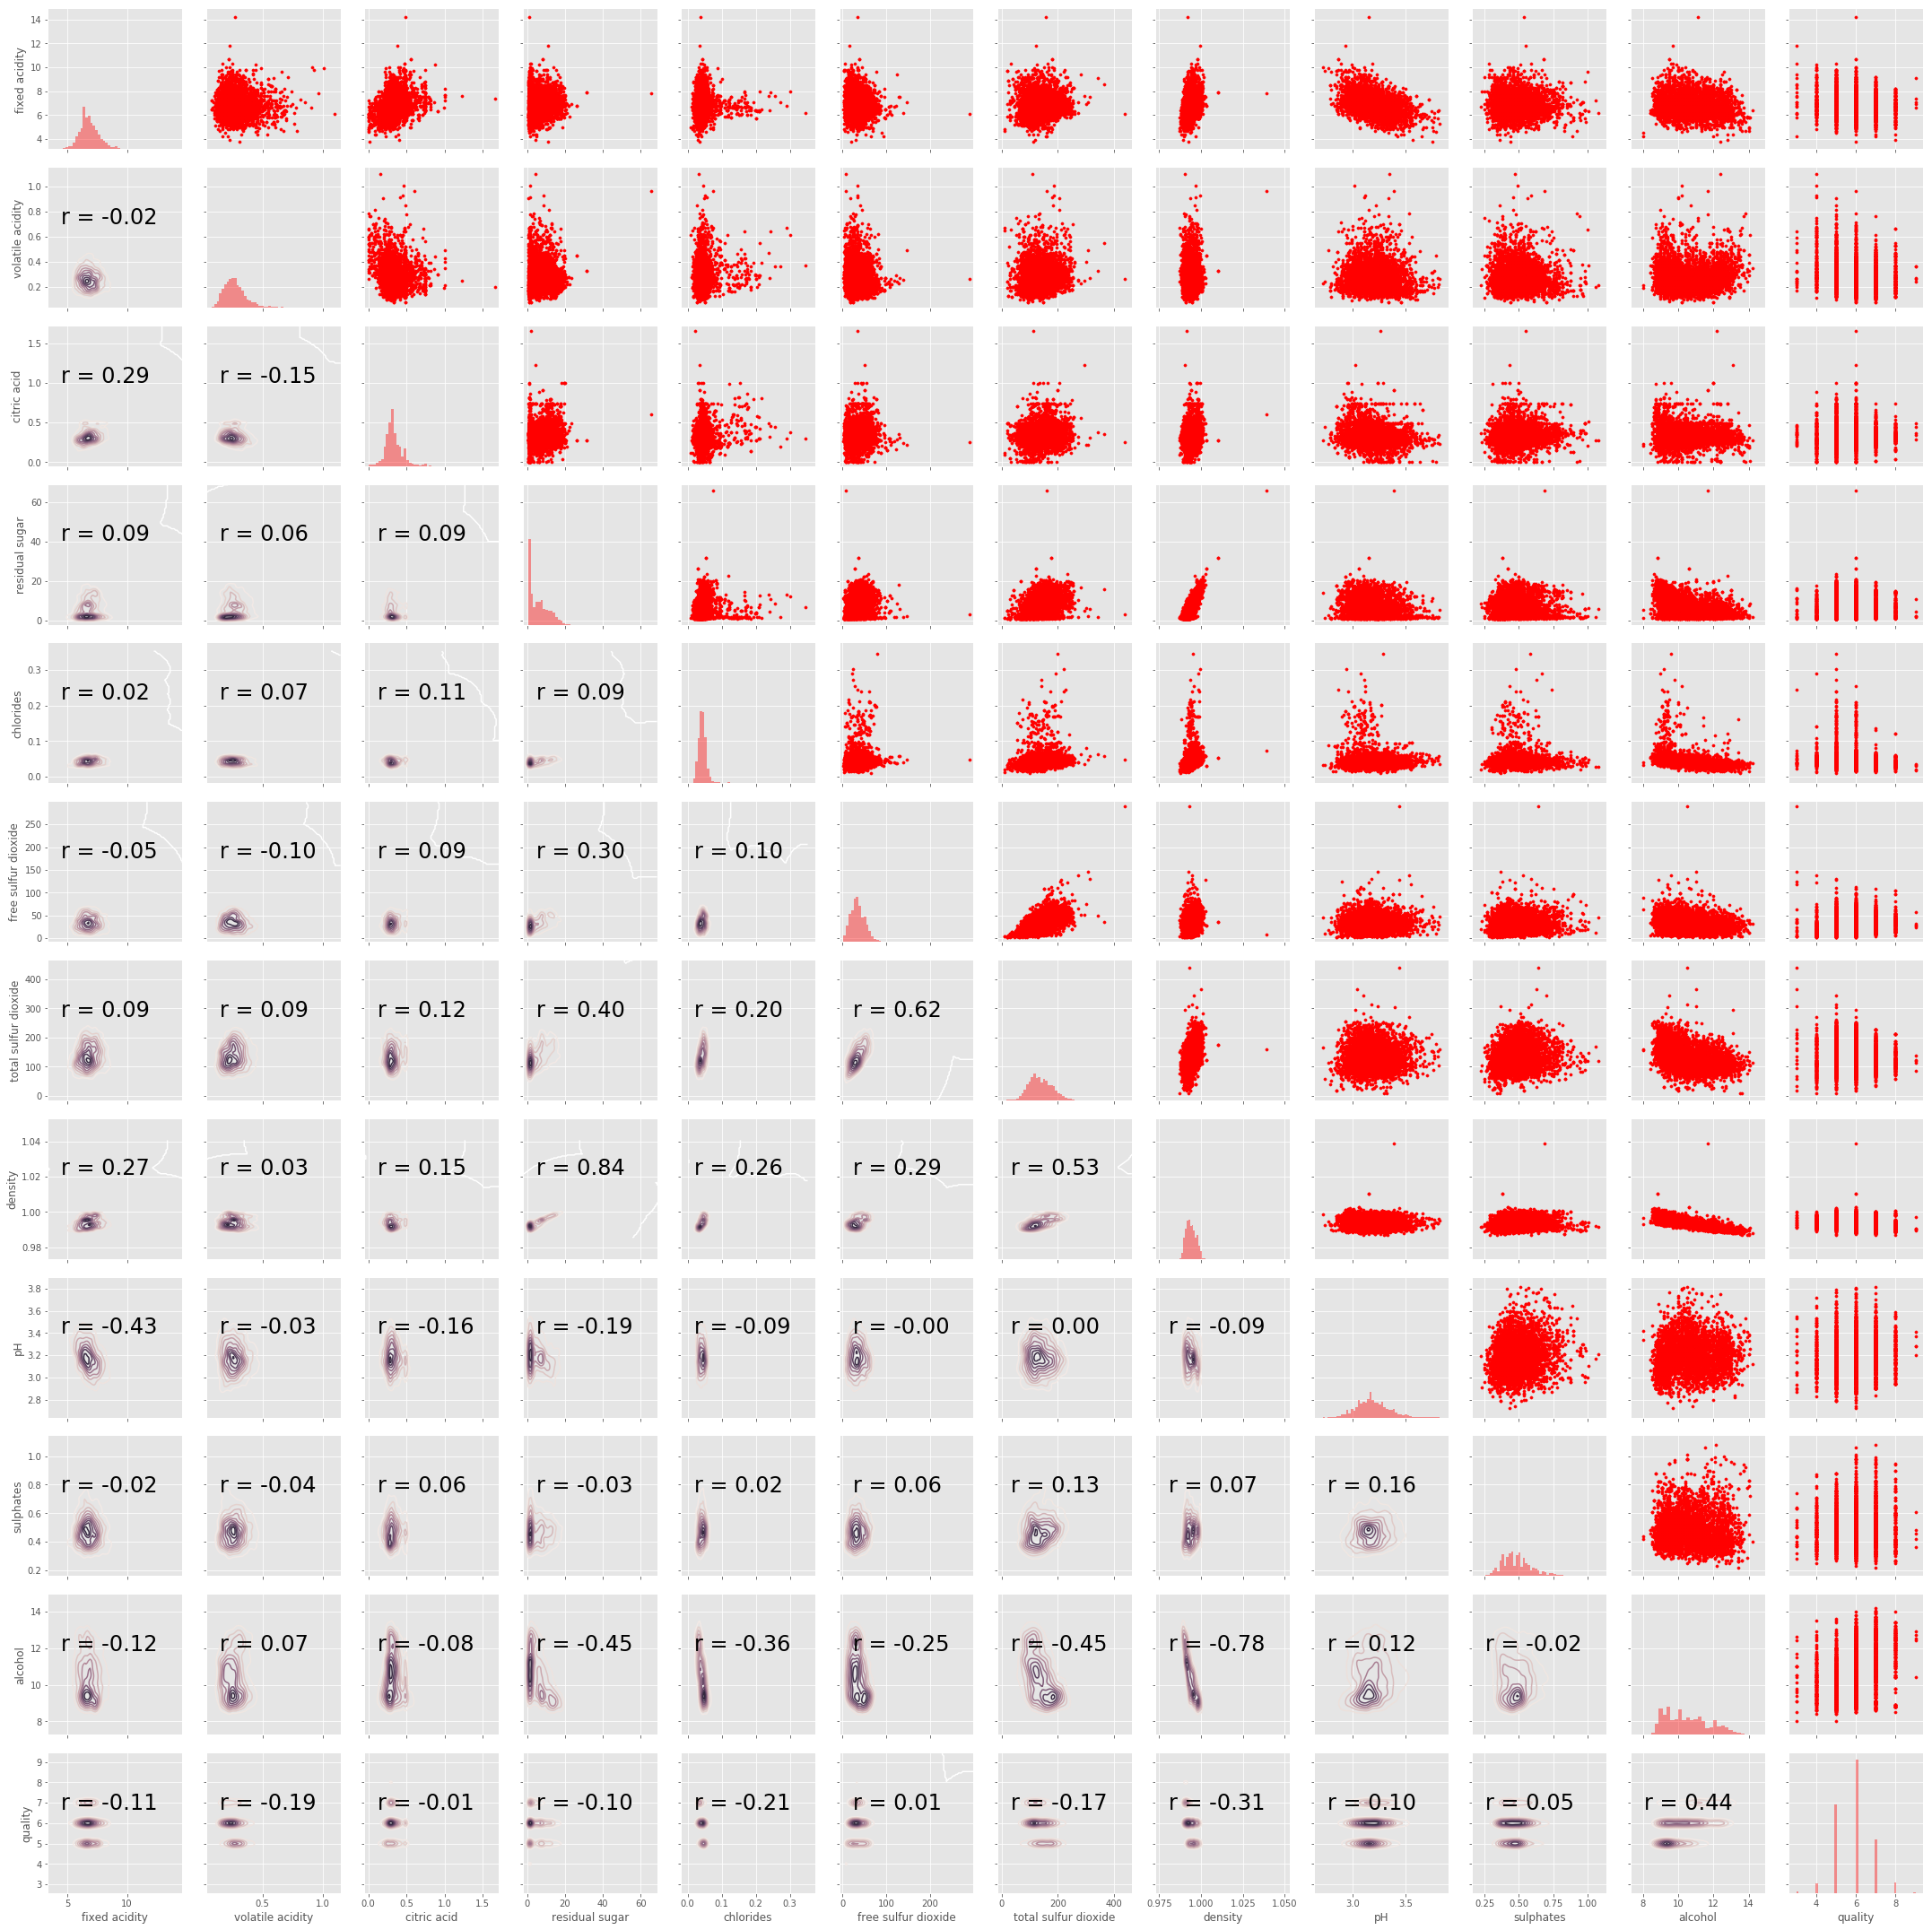

In [14]:
print('Solution 18')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [15]:
print('Solution 19')
#dropping alcohol from the dataframe because alcohol
df.corr().abs().unstack().sort_values().drop_duplicates()
df=df.drop(labels='alcohol',axis=1)

Solution 19


In [16]:
print('Solution 20')
def train_test_split(X,y,t):
    size = X.shape[0]
    split_idx = int(size*t)    
    return X[:split_idx], X[split_idx:],y[:split_idx], y[split_idx:]
    

Solution 20


In [17]:

print('Solution 21')
import statistics as stats
X_train , X_test, y_train, y_test=train_test_split(X,y,0.8)

print("before scaling:",X_train[0])
knn=KnnClassifier()
knn.fit(X_train,y_train,5,2)
y_pred, y_score_class_one, y_score_class_zero=knn.predict(X_test)

print("Solution 21 a")
f1_score_value=f1_score(y_test,y_pred)
print("F1 Score: ",f1_score_value)

acc=get_accuracy(y_test,y_pred)
print("Accuracy: ", acc)


Solution 21
before scaling: [7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
 1.001e+00 3.000e+00 4.500e-01 8.800e+00]
Solution 21 a
F1 Score:  0.79616963
Accuracy:  0.69591837


In [18]:
print("Solution 21 b")


X_train_scale=np.zeros(shape=(X_train.shape[0],X_train.shape[1]))
for j in range(X_train.shape[1]):
    mean_scale=np.mean(X_train[:,j])
    standard_deviation=np.std(X[:,j])
    for i in range(X_train.shape[0]): 
        if(standard_deviation==0):
            print("standard:train")
        X_train_scale[i,j] = (X_train[i,j]-mean_scale)/standard_deviation
X_test_scale=np.zeros(shape=(X_test.shape[0],X_test.shape[1]))     
for j in range(X_test.shape[1]):
    mean_scale=np.mean(X_test[:,j])
    standard_deviation=np.std(X_test[:,j])
    for i in range(X_test.shape[0]): 
        if(standard_deviation==0):
            print("standard:test")
        X_test_scale[i,j] = (X_test[i,j]-mean_scale)/standard_deviation


print("Solution 21 c")

knn=KnnClassifier()
knn.fit(X_train_scale,y_train,5,2,weights="distance")
y_pred_scale,prob1,prob0=knn.predict(X_test_scale)
print("y_pred_scale",y_pred_scale,"prob1", prob1,"prob 0",prob0)
f1_score_scale=f1_score(y_test,y_pred_scale)
print("F1 Score after scaling: ",f1_score_scale)

accuracy_scale=get_accuracy(y_test,y_pred_scale)
print("Accuracy after scaling: ", accuracy_scale)

Solution 21 b
Solution 21 c
y_pred_scale [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


In [19]:
print("Solution 21 d")#compare accuracy values

print("Solution 21 e")#calculate the distance function
knn_inverse_distance=KnnClassifier()
knn_inverse_distance.fit(X_train,y_train,5,2,weights="distance")
y_pred_inv, y_score_class_one_inv, y_score_class_zero_inv=knn_inverse_distance.predict(X_test)


f1_score_value_inv=f1_score(y_pred_inv,y_test)
print("F1 Score after applying weights:distance: ",f1_score_value_inv)

acc_inv=get_accuracy(y_pred_inv,y_test)
print("Accuracy after applying weights:distance: ", acc_inv)

Solution 21 d
Solution 21 e
F1 Score after applying weights:distance:  0.79643592
Accuracy after applying weights:distance:  0.69693878


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in double_scalars
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


# Part C: Model Evaluation

In [20]:
print('Solution 22')

def partition_data(data,folds):
    split_idx=int(data.shape[0]/folds)
    #print(split_idx)
    idx=[]
    indexes= np.arange(0,data.shape[0])
    for f in range(folds):
        
        test = indexes[:split_idx]
        train = indexes[split_idx:]
        i=np.arange(0,split_idx)
        indexes=np.delete(indexes,i)
        #print(indexes)
        indexes=np.append(indexes,test)
        #print(indexes)
        idx.append((train,test))
    return np.asarray(idx)
        
def sFold(folds, data, labels, model, error_function, **model_args):
    
    split_folds=partition_data(data,folds)
    avg_error_function=0
    true_labels=[]
    pred_labels=[]
    k=5
    distance=1
    for key, value in model_args.items(): 
            if key=='k':
                k=value
            if key=='distance':
                distance=value
    for train_index, test_index in split_folds:
        X_t, X_te = data[train_index], data[test_index]
        y_t, y_te = labels[train_index], labels[test_index]
             
        model.fit(X_t,y_t,k,distance)
        y_pred=model.predict(X_te)[0]
        
        true_labels.append(y_te)
        pred_labels.append(y_pred)
        score=0
        if error_function=="accuracy":
            score=get_accuracy(y_te,y_pred)
        elif error_function=="generalization_error":
            score=get_generalization_error(y_te,y_pred)
        elif error_function=="precision":
            score=precision_score(y_te,y_pred)
        elif error_function=="recall":
            score=recall_score(y_te,y_pred)
        elif error_function=="f1_score":
            score=f1_score(y_te,y_pred)
        
        avg_error_function=(avg_error_function+score)
        
    avg_error_function=avg_error_function/split_folds.shape[0] 
    return {"True_labels": true_labels, "Expected_labels": pred_labels, "Error_function":avg_error_function}

Solution 22


In [21]:
print('Solution 23')

k = [1,5,9,11]
distance = ["Euclidean", "Manhattan"]
coded_distance= [2,1]

results=[]
best_f1_score=0
best_neighbour=0
best_knn=""
best_distance=0


for neighbours in k:
    for d in coded_distance:
        knn = KnnClassifier()
        
        current_f1_score=sFold(3, X_train, y_train, knn, "f1_score",k=neighbours,distance=d,weights="distance")["Error_function"]
        print("neighbour",neighbours,"distance",d,  "f1_score", current_f1_score)
        if (best_f1_score < current_f1_score):
            best_neighbour, best_distance, best_knn, best_f1_score = neighbours,d,knn,current_f1_score
print("best_neighbour",best_neighbour,"best_distance",best_distance, "best_knn",best_knn, "best_f1_score", best_f1_score)
            

Solution 23
neighbour 1 distance 2 f1_score 0.62928233
neighbour 1 distance 1 f1_score 0.62976097
neighbour 5 distance 2 f1_score 0.71343287
neighbour 5 distance 1 f1_score 0.7146622033333333
neighbour 9 distance 2 f1_score 0.74415131
neighbour 9 distance 1 f1_score 0.7455632799999999
neighbour 11 distance 2 f1_score 0.7430381066666666
neighbour 11 distance 1 f1_score 0.7532818333333333
best_neighbour 11 best_distance 1 best_knn <__main__.KnnClassifier object at 0x7f403ea46e80> best_f1_score 0.7532818333333333


In [23]:
print('Solution 24')
knn_best=KnnClassifier()
knn_best.fit(X_train,y_train,best_neighbour,best_distance)
y_best_pred,y_scores,y_=knn_best.predict(X_test)


print("a. Precision: ", precision_score(y_test,y_best_pred))

print("b. Recall: ", recall_score(y_test,y_best_pred))

print("c. F1 Score: ",f1_score(y_test,y_best_pred))

print("d. Confusion matrix: ", confusion_matrix(y_test,y_best_pred))
acc_best=get_accuracy(y_test,y_best_pred)
print("e. Accuracy: ", acc_best)
tpr,fpr,t=get_tpr_fpr_threshold(y_best_pred,y_scores)
print("fpr",fpr)
print("tpr",tpr)



Solution 24
a. Precision:  0.76404494
b. Recall:  0.88953488
c. F1 Score:  0.8220282
d. Confusion matrix:  [[103 189]
 [ 76 612]]
e. Accuracy:  0.72959184
fpr [1.0, 0.9716713881019831, 0.924812030075188, 0.870604781997187, 0.7730337078651686, 0.6435921421889617, 0.5512820512820513, 0.4821303433777155, 0.42839352428393523, 0.3854341736694678, 0.35030549898167007]
tpr [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9814517567326556, 0.9502184769038702, 0.9087252046053544, 0.8534332084893883, 0.7881932433990545]


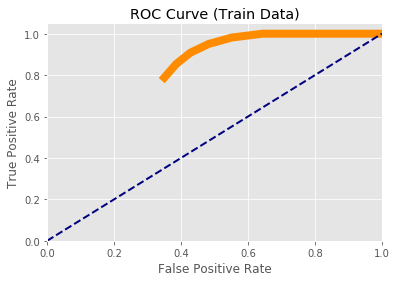

Area under the curve:  -0.6312825330950445


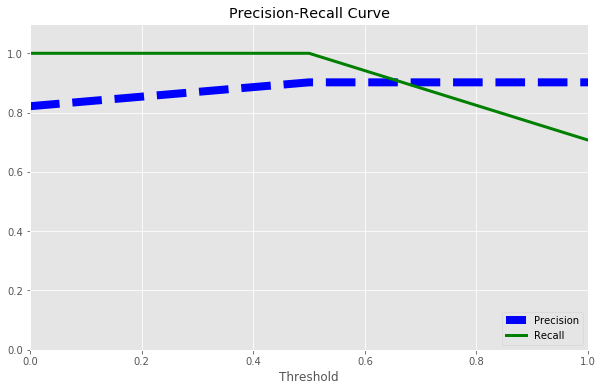

In [32]:
plot_roc_curve(fpr,tpr)
print("Area under the curve: ",area_under_curve(tpr,fpr))
generate_precision_recall_curve(y_best_pred,y_scores)

In [ ]:
print('Solution 25')
import math
def confidence_interval(metric):
    
    lowerbound = metric - 1.96*math.sqrt(err*(1-err)/len(X_train))
    upperbound = metric + 1.96*math.sqrt(err*(1-err)/len(X_train))
    
    return lowerbound,upperbound
err = get_generalization_error(y_test,y_pred)
print("95% Confidence interval: ",confidence_interval(err))